In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/classification_data.csv')
df

,X1,X2,y
0,-2.056844,-0.752741,0
1,1.760238,1.558517,1
2,-0.447763,-1.554927,1
3,1.008459,0.529517,1
4,0.636547,0.409058,1
...,...,...,...
95,-0.129932,-0.797169,0
96,1.426902,1.244639,1
97,-0.582968,1.630750,1
98,-0.619720,1.630840,0


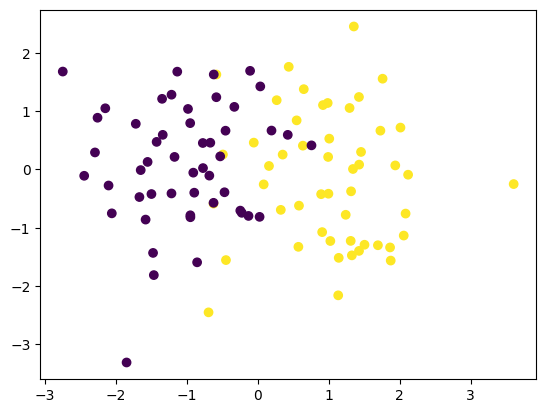

In [2]:
##시각화
import matplotlib.pyplot as plt
plt.scatter(df['X1'],df['X2'], c= df['y'])

In [3]:
#로지스틱 회귀 학습
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()


In [4]:
x= df[['X1','X2']]
y= df['y']

In [5]:
#학습
reg.fit(x,y)

LogisticRegression()

In [6]:
#평가지표
#정확도
#precision
#recall
#roc

In [7]:
#정확도
y_pred = reg.predict(x) #모델이 예측한 값 넘파이 

In [8]:
y #모델이 맞춰야 하는 정답 시리즈

0     0
1     1
2     1
3     1
4     1
     ..
95    0
96    1
97    1
98    0
99    1
Name: y, Length: 100, dtype: int64

In [9]:
#정확도  참 -> 참 / 거짓->거짓 비율

In [31]:
import numpy as np
accuracy = np.sum(y_pred == y) / y.size # y.count() 동일
accuracy

0.89

In [11]:
#precision
#모델이 1이라고 예측한 데이터 중 실제로 참인 것의 비율

In [12]:
df['y_pred'] = y_pred
df
#y_pred == 1 

,X1,X2,y,y_pred
0,-2.056844,-0.752741,0,0
1,1.760238,1.558517,1,1
2,-0.447763,-1.554927,1,0
3,1.008459,0.529517,1,1
4,0.636547,0.409058,1,1
...,...,...,...,...
95,-0.129932,-0.797169,0,1
96,1.426902,1.244639,1,1
97,-0.582968,1.630750,1,0
98,-0.619720,1.630840,0,0


In [13]:
len(df[df['y_pred']==1])
df[df['y_pred']==1]

,X1,X2,y,y_pred
1,1.760238,1.558517,1,1
3,1.008459,0.529517,1,1
4,0.636547,0.409058,1,1
5,1.310662,-1.225580,1,1
6,0.992554,0.215416,1,1
7,1.874661,-1.563427,1,1
9,0.026274,-0.813063,0,1
11,1.354681,2.455158,1,1
15,2.084350,-0.756736,1,1
17,1.865498,-1.337999,1,1


In [14]:
##true positive
tp = len(df[(df['y_pred']==1)&(df['y']==1)])
tp

44

In [15]:
##true negative 
tn = len(df[(df['y_pred']==0)&(df['y']==0)])
tn

45

In [16]:
#false positivie
fp = len(df[(df['y_pred']==1)&(df['y']==0)])
fp

5

In [17]:
#false negative
fn = len(df[(df['y_pred']==0)&(df['y']==1)])
fn

6

In [18]:
accuracy = (tp+tn) / (tp+tn+fp+fn)
accuracy

0.89

In [19]:
#precision
precision = tp/(tp+fp)
precision

0.8979591836734694

In [20]:
recall = tp/(tp+fn)
recall

0.88

In [21]:
#confusion matrix 구하기
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y) 
confusion_matrix(y,y_pred) # <- 2번째 원래 코드

(array([[45,  6],
        [ 5, 44]], dtype=int64),
 array([[45,  5],
        [ 6, 44]], dtype=int64))

In [22]:
#roc 구하기
#의사결정 기준 0~1 까지 변경시켜가며 true positive ,false positive 위치 그래프로 그린것

#roc curve 너비가 클수록 1에 가까울 수록 완벽한 분류모형
#0.5에 가까울 수록 잘못된 분류 모형


In [33]:
#의사결정 기준th에 따라 y_pred를 구하는 함수
def predict_th(reg, th):
  result = []
  for i in reg.predict_proba(x)[:,1]: #1로 분류될 확률
      if i > th:
        result.append(1)
      else:
        result.append(0)

  return np.array(result)

predict_th(reg, 0.7)

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [24]:
reg.predict_proba(x)

array([[9.90204636e-01, 9.79536428e-03],
       [2.16034429e-02, 9.78396557e-01],
       [6.01220904e-01, 3.98779096e-01],
       [8.59905428e-02, 9.14009457e-01],
       [1.81847933e-01, 8.18152067e-01],
       [2.31471531e-02, 9.76852847e-01],
       [8.01536679e-02, 9.19846332e-01],
       [5.28638688e-03, 9.94713613e-01],
       [9.77531302e-01, 2.24686977e-02],
       [3.84792683e-01, 6.15207317e-01],
       [9.41969580e-01, 5.80304202e-02],
       [7.59873010e-02, 9.24012699e-01],
       [9.65035530e-01, 3.49644700e-02],
       [6.63214901e-01, 3.36785099e-01],
       [8.71347465e-01, 1.28652535e-01],
       [4.27442195e-03, 9.95725578e-01],
       [5.57538943e-01, 4.42461057e-01],
       [5.86839648e-03, 9.94131604e-01],
       [1.10591010e-01, 8.89408990e-01],
       [3.84522870e-01, 6.15477130e-01],
       [1.42199788e-01, 8.57800212e-01],
       [9.36857280e-01, 6.31427205e-02],
       [9.96690025e-01, 3.30997536e-03],
       [2.83124745e-02, 9.71687526e-01],
       [5.814663

In [25]:
#의사결정 기준th에 따라 tpr과 fpr을 얻는 함수
def get_tpr_fpr(reg,th):
  y_hat = predict_th(reg,th)
  cm = confusion_matrix(y,y_hat)
  tp = cm[1][1]
  fp = cm[0][1]
  tn = cm[0][0]
  fn = cm[1][0]

  tpr = tp/(tp+fn) #실제 POS 인 것 중에 모델이 POS라고 예측한 비율 (잘 예측한 비율)
  # Recall(True Positive Rate)
  fpr = fp/(tn+fp) # 실제 NEG DLS 인 것 중에 모델이 POS 라고 예측 (잘못 예측)

  return tpr, fpr

get_tpr_fpr(reg,0.7)

(0.8, 0.04)

In [26]:
tpr_result=[]
fpr_result=[]
for th in np.linspace(0,1,100):
  tpr, fpr = get_tpr_fpr(reg,th)
  tpr_result.append(tpr)
  fpr_result.append(fpr)

In [27]:
tpr_result

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.92,
 0.92,
 0.92,
 0.92,
 0.92,
 0.92,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.88,
 0.88,
 0.88,
 0.88,
 0.88,
 0.88,
 0.88,
 0.88,
 0.88,
 0.88,
 0.88,
 0.88,
 0.88,
 0.86,
 0.86,
 0.84,
 0.82,
 0.82,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.78,
 0.78,
 0.78,
 0.78,
 0.78,
 0.76,
 0.72,
 0.72,
 0.72,
 0.72,
 0.72,
 0.7,
 0.7,
 0.7,
 0.7,
 0.68,
 0.68,
 0.66,
 0.64,
 0.62,
 0.62,
 0.6,
 0.54,
 0.5,
 0.48,
 0.44,
 0.36,
 0.24,
 0.18,
 0.0]

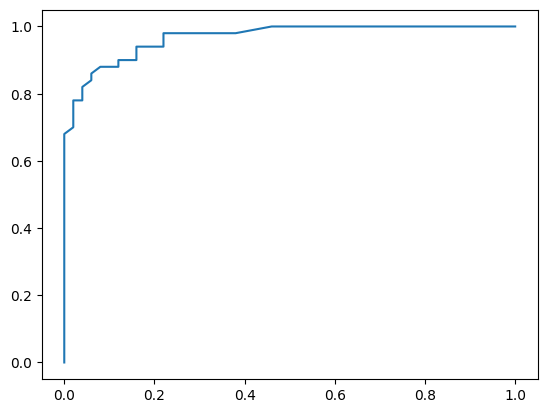

In [28]:
plt.plot(fpr_result, tpr_result)

In [29]:
# sklearn 이용해 roc 면적 구하기
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score
print('roc', roc_auc_score(y, reg.predict_proba(x)[:,1]))
print('presicion', precision_score(y, y_pred))
print('recall', recall_score(y, y_pred))
print('accuracy', accuracy_score(y, y_pred))

roc 0.9672000000000001
presicion 0.8979591836734694
recall 0.88
accuracy 0.89
